In [1]:
import pandas as pd

In [16]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
df = bank_marketing.data.original

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [17]:
df.drop(columns=['poutcome'],axis=1,inplace=True)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df = imputer.fit_transform(df)

df = pd.DataFrame(df,
                  columns=bank_marketing.data.original.columns)

df = df.astype(bank_marketing.data.original.dtypes.to_dict())

In [18]:
# converting y to numeric
y_map = {'yes':1,'no':0}
df['y'] = df['y'].apply(lambda x: y_map[x.strip().lower()])

In [19]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,0
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,0


In [20]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'y'],
      dtype='object')

## Non-linear transformtation

We saw in the EDA notebook that none of the numerical features have uniform or normal distrubtion and the data is skewed. So we will perform non-linear transformations like taking logarithm of the input value before scaling it. Other common transformations include the sigmoid and polynomial expansions (square, square root, cube, cube root, and so on). 

## Scaling

Min-max and clipping tend to work best for uniformly distributed data, and Z-score tends to work best for normally distributed data.

## Treating numerical columns as categorical columns:

In some circumstances, it can be helpful to treat a numeric input as categorical and map it to a one-hot encoded column

1. ### When the numeric input is an index:

    For example, if we are trying to predict traffic levels and one of our inputs is the day of the week, we could treat the day of the week as
    numeric (1, 2, 3, …, 7), but it is helpful to recognize that the day of the week here is not a continuous scale but really just an index. It is better to treat it as categorical (Sunday, Monday, …, Saturday) because the indexing is arbitrary. Should the week start on Sunday (as in the USA), Monday (as in France), or Saturday (as in Egypt)?


2. ### When the relationship between input and label is not continuous:

    What should tip the scale toward treating day of the week as a categorical feature is that traffic levels on Friday are not affected by
    those on Thursday and Saturday.

3. ### When it is advantageous to bucket the numeric variable:

    In most cities, traffic levels depend on whether it is the weekend, and this can vary by location (Saturday and Sunday in most of the world, Thursday and Friday in some Islamic countries). It would be helpful to then treat day of the week as a boolean feature (weekend or weekday).

4. ### When we want to treat different values of the numeric input as being independent when it comes to their effect on the label:

    For example, the weight of a baby depends on the plurality of the delivery since twins and triplets tend to weigh less than single births.
    So, a lower-weight baby, if part of a triplet, might be healthier than a twin baby with the same weight. When a categorical variable is one-hot encoded, each category (e.g., twins, triplets) becomes a separate binary feature. This allows the model to learn independent tunable parameters (weights) for each category, which means the model can assign different importance to each category when making predictions. In contrast, if plurality were treated as a numerical variable, the model would need to assume a single weight for the entire range of numerical values, potentially oversimplifying the relationship.

In this case, none of the numerical columns fall into the above 4 categories so there is no benefit in treating it as a categorical column.

### Another example of representing numerical as categorical data:

As an input, a `rating` column can be represented both as an integer value ranging from 1 to 5 and as a categorical feature. To represent rating categorically, we can bucket it. The reason it’s useful to represent rating in two ways is because the value of rating as measured by 1 to 5 stars does not necessarily increase linearly. Ratings of 4 and 5 are very similar, and ratings of 1 to 3 most likely indicate that the reviewer was dissatisfied.

To keep things simple, let’s say we want to create two buckets: “good” and “bad.” The “good” bucket includes ratings of 4 and 5, and
“bad” includes 3 and below. We can then create a boolean value to encode the rating buckets and concatenate both the integer and boolean into a
single array.

```python
rating_data = [2, 3, 5]
def good_or_bad(rating):
    if rating > 3:
        return 1
    else:
        return 0

rating_processed = []
for i in rating_data:
    rating_processed.append([i, good_or_bad(i)])
```

The resulting feature is a two-element array consisting of the integer rating and its boolean representation:

`[[2, 0], [3, 0], [5, 1]]`

If we had instead decided to create more than two buckets, we would one-hot encode each input and append this one-hot array to the integer
representation.


Or let's take another column like the `distance between a reviewer’s home and a restaurant`. If someone drives two hours to go to a restaurant, their review may be more critical than someone coming from across the street. In this case, we might have outlier
values, and so it would make sense to both threshold the numeric distance representation at something like 50 km and to include a separate
categorical representation of distance. The categorical feature could be bucketed into “in state,” “in country,” and “foreign.”

## Design Patterns

1. Pattern 1: Using hashed value for categorical values

2. Pattern 2: Embbedings - The Embeddings design pattern addresses the problem of representing high-cardinality data densely in a lower dimension by passing the input data through an embedding layer that has trainable weights. This will map the high-dimensional, categorical input variable to a real-valued vector in some low-dimensional space.

3. Pattern 3: Feature Cross - The Feature Cross design pattern helps models learn relationships between inputs faster by explicitly making each combination of input values a separate feature. For example, it makes sense to consider a feature cross of day_of_week and hour_of_day (in taxi fare prediction) since it’s reasonable to assume that taxi rides at 5pm on Monday should be treated differently than taxi rides at 5 p.m. on Friday. When choosing which features to combine for a feature cross, we would not want to cross two features that are highly correlated.

4. Pattern 4: Multimodal Input - The Multimodal Input design pattern addresses the problem of representing different types of data or data that can be expressed in complex ways by concatenating all the available data representations.

## Pattern 2: Embeddings

In [21]:
len(df)

45211

In [22]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler


In [31]:
#get the categorical and numerical columns

num_columns = df.select_dtypes(exclude='object').columns
cat_columns = df.select_dtypes(exclude='object').columns

#convert categorical columns
for col in cat_columns:
    df[col] = df[col].astype('category').cat.codes

#scale numerical columns
scaler = StandardScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

#create embedding layer for each categorical column
embedding_layers = []
inputs = []

for col in cat_columns:
    unique_values = df[col].nunique()
    #embedding_dim = int(min((0.5**(unique_values ** 0.5)), 1.6 * (unique_values ** 0.5)))
    embedding_dim = int(min(50, max(1.6 * (unique_values ** 0.5), 4)))
    input_layer = Input(shape=(1,), name=col)  # Input layer for categorical column
    embedding_layer = Embedding(input_dim=unique_values+1, output_dim=embedding_dim, name=f'{col}_embedding')(input_layer)
    embedding_layer = Flatten()(embedding_layer)
    embedding_layers.append(embedding_layer)
    inputs.append(input_layer)

#input layer for numerical features
num_input_layer = Input(shape=(len(num_columns),), name='numerical_input')
inputs.append(num_input_layer)

#combine numerical and categorical (multimodal design)
merged_layer = tf.keras.layers.Concatenate()(embedding_layers + [num_input_layer])

#neural netowkr
dense_layer = Dense(64, activation='relu')(merged_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer)  #binary classification
model = Model(inputs=inputs, outputs=output_layer)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

X_categorical = {col: df[col].values for col in cat_columns}
X_numerical = df[num_columns].values
y = df['y'].astype(float).values  # Assuming 'y' is your target column

# Train the model
history = model.fit([*X_categorical.values(), X_numerical], y, epochs=10, batch_size=32, validation_split=0.2)

# Step 11: Add early stopping to prevent overfitting (optional)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit([*X_categorical.values(), X_numerical], y, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])



Epoch 1/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0000e+00 - loss: -1075.8987 - val_accuracy: 0.0000e+00 - val_loss: 21021.1230
Epoch 2/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0000e+00 - loss: -33041.7383 - val_accuracy: 0.0000e+00 - val_loss: 143197.9219
Epoch 3/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0000e+00 - loss: -153296.7500 - val_accuracy: 0.0000e+00 - val_loss: 405357.0000
Epoch 4/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+00 - loss: -390940.8438 - val_accuracy: 0.0000e+00 - val_loss: 825934.0625
Epoch 5/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0000e+00 - loss: -739968.8750 - val_accuracy: 0.0000e+00 - val_loss: 1433616.5000
Epoch 6/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0000e+00 - loss: -1238798.1250 - val_accuracy: 0.0000e+00 - val_loss: 2236805.5000
Epoch 7/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0000e+00 - loss: -1899388.1250 - val_ac

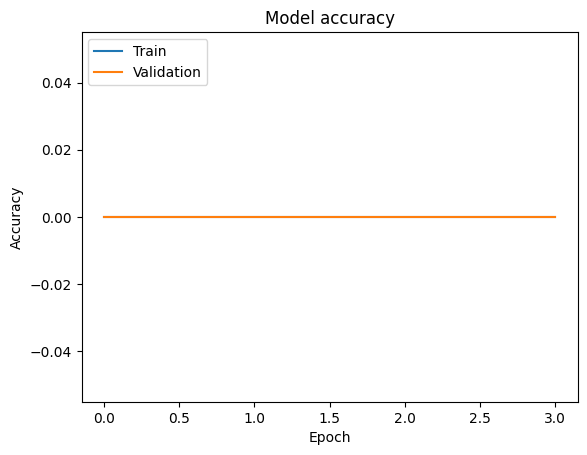

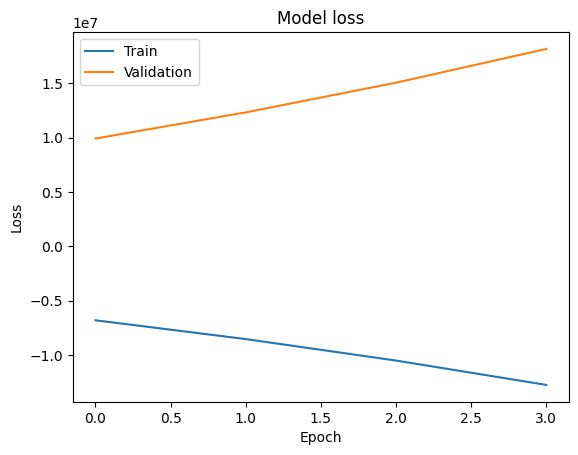

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
